In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()

# store the feature matrix (X) and response vector (y) 
x = iris.data 
y = iris.target

# splitting X and y into training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
def fit(X, Y):

  X = pd.DataFrame(X, columns=iris.feature_names)
  Y = pd.DataFrame(Y).loc[:,0]

  mean = X.groupby(by=Y).mean()
  var = X.groupby(by=Y).var()
  
  mean = np.array(mean)
  var = np.array(var)

  return mean, var

In [ ]:
def cond_prob_xC (v, mean, var):
  prob = (1/np.sqrt(2*np.pi*var))*np.exp(-1*np.square(v - mean)/(2*var))
  return prob

In [ ]:
def pri_prob (y_train):
  val, count = np.unique(y_train, return_counts=True)
  pri_prob = (count/len(y_train)).reshape((len(val), 1))
  return pri_prob

In [ ]:
def po_prob (prob, prior_prob):
  prob = np.prod(prob, axis = 1).reshape((3,1))
  post_prob = prob * prior_prob
  return post_prob

In [ ]:
def roc(test, n, y_score):

  y_test = np.zeros((len(test),))

  for i in range (len(test)):
    if(test[i] != n):
      y_test[i] = 0
    else:
      y_test[i] = 1

  sc = y_score[:,n].reshape(len(y_score),)
  fpr, tpr, thresholds = roc_curve(y_test, sc)
  roc_auc = auc(fpr, tpr)
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

In [ ]:
def predict(x_train, y_train, x_test, y_test ):

  print('Initiating Prediction')
  print('=============================')


  mean, var = fit(x_train, y_train)
  print("Mean of the training data is")
  print(mean)
  print('Varince of the training data is')
  print(var)


  print('=============================')
  print('Calculating Prior Probability')
  prior_prob = pri_prob(y_train)
  print("Prior Probability of training data is")
  print(prior_prob)


  print('=============================')
  y_score = np.zeros((len(y_test), (len(np.unique(y_test)))))
  pred = np.zeros(shape=(1, len(x_test)))
  for i in range (len(x_test)):
    cond_prob = cond_prob_xC (x_test[i], mean, var)
    post_prob = po_prob (cond_prob, prior_prob)
    y_score[i] = post_prob.reshape(3,)
    result, _ = np.where(post_prob == np.amax(post_prob))
    pred[0][i] = result
  print("Prediction on the training data is as follows")
  print(pred)


  print('=============================')
  print("Calculating Accuracy")
  truth = pred == y_test
  count = np.count_nonzero(truth)
  acc = (count/len(y_test)) * 100
  print("Accuracy achieved is:", acc)


  print('=============================')
  print("Calculating Class-wise Accuracy")
  class_wise = np.zeros((len(np.unique(y_test)), 2))
  for i in range(len(y_test)):
    if(y_test[i] == 0):
      class_wise[0][1] = class_wise[0][1] + 1
      if (pred[0][i] == 0):
        class_wise[0][0] = class_wise[0][0] + 1
    if(y_test[i] == 1):
      class_wise[1][1] = class_wise[1][1] + 1
      if (pred[0][i] == 1):
        class_wise[1][0] = class_wise[1][0] + 1
    if(y_test[i] == 2):
      class_wise[2][1] = class_wise[2][1] + 1
      if (pred[0][i] == 2):
        class_wise[2][0] = class_wise[2][0] + 1
  for i in range(len(np.unique(y_test))):
    print("Accuracy for class {} is {}".format(i,(class_wise[i][0]/class_wise[i][1])*100 ))


  print("=============================")
  print("Printing confusion matrix")
  print(confusion_matrix(y_test, pred.reshape(len(y_test),)))
  
  for i in range(3):
    print("=============================")
    print("printing ROC curve for class {}".format(i))
    roc(y_test, i, y_score)

  return pred.reshape(len(y_test),)

Initiating Prediction
Mean of the training data is
[[4.94358974 3.36666667 1.42820513 0.22564103]
 [5.88717949 2.75128205 4.22051282 1.32307692]
 [6.59285714 3.00238095 5.5452381  2.04285714]]
Varince of the training data is
[[0.12147099 0.12807018 0.02839406 0.01037787]
 [0.2879892  0.09940621 0.25483131 0.04392713]
 [0.40311847 0.1002381  0.29668409 0.06348432]]
Calculating Prior Probability
Prior Probability of training data is
[[0.325]
 [0.325]
 [0.35 ]]
Prediction on the training data is as follows
[[2. 1. 1. 2. 0. 1. 1. 0. 2. 2. 0. 0. 0. 1. 2. 0. 0. 1. 2. 1. 0. 1. 1. 0.
  1. 0. 1. 0. 1. 1.]]
Calculating Accuracy
Accuracy achieved is: 93.33333333333333
Calculating Class-wise Accuracy
Accuracy for class 0 is 100.0
Accuracy for class 1 is 100.0
Accuracy for class 2 is 75.0
Printing confusion matrix
[[11  0  0]
 [ 0 11  0]
 [ 0  2  6]]
printing ROC curve for class 0


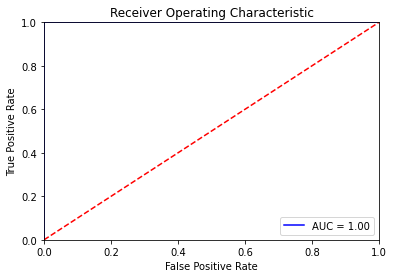

printing ROC curve for class 1


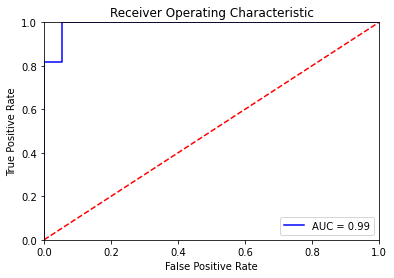

printing ROC curve for class 2


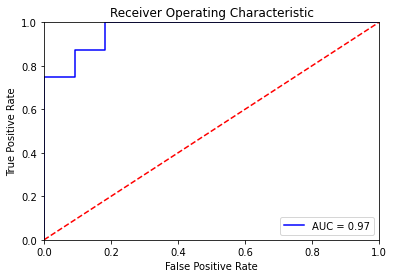

In [ ]:
pred = predict(x_train, y_train, x_test, y_test )